<a href="https://colab.research.google.com/github/taskswithcode/probability_for_ml_notebooks/blob/main/MLToyModel_arith.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning Toy Model- using just arithmetic and no calculus**

This is a toy model with **one number** to be learned from training data.

The input to the model is the number of rooms in a house and the model output is the price of the house

We first create a dummy dataset of say 10 homes with the number of rooms and prices for each home.
The model function we chose quite simple:-
   price = **m** * rooms.

The model has to learn the value of **m**, that best fits the training data.

We start off with a random value of **m**.

We feed in all the rooms as input and the model outputs its price predictions


We then compare the predicted price and actual price and see how far off the model is. We subtract the predicted price from the actual price of a home and square that value to avoid negative values. This is our model error or loss function


**Loss function L**

              = 1/n Σ (predicted - actual) * (predicted - actual), where n is the number of training points

              = 1/n [ (y1 - m * x1) * (y1 - m * x1)   + (y2 - m * x2) * (y2 - m * x2) +.... (y10 - m * x10) * (y10 - m * x10) ]
            
Note, in the loss function above, xs and ys are all constant values - they are training data values. The only *changeable quantity is* **m**.


We want to tweak the value of **m** so that the model error is minimized. To do this, see the curve below where **m** is plotted on the x axis and the loss/error on the y axis.
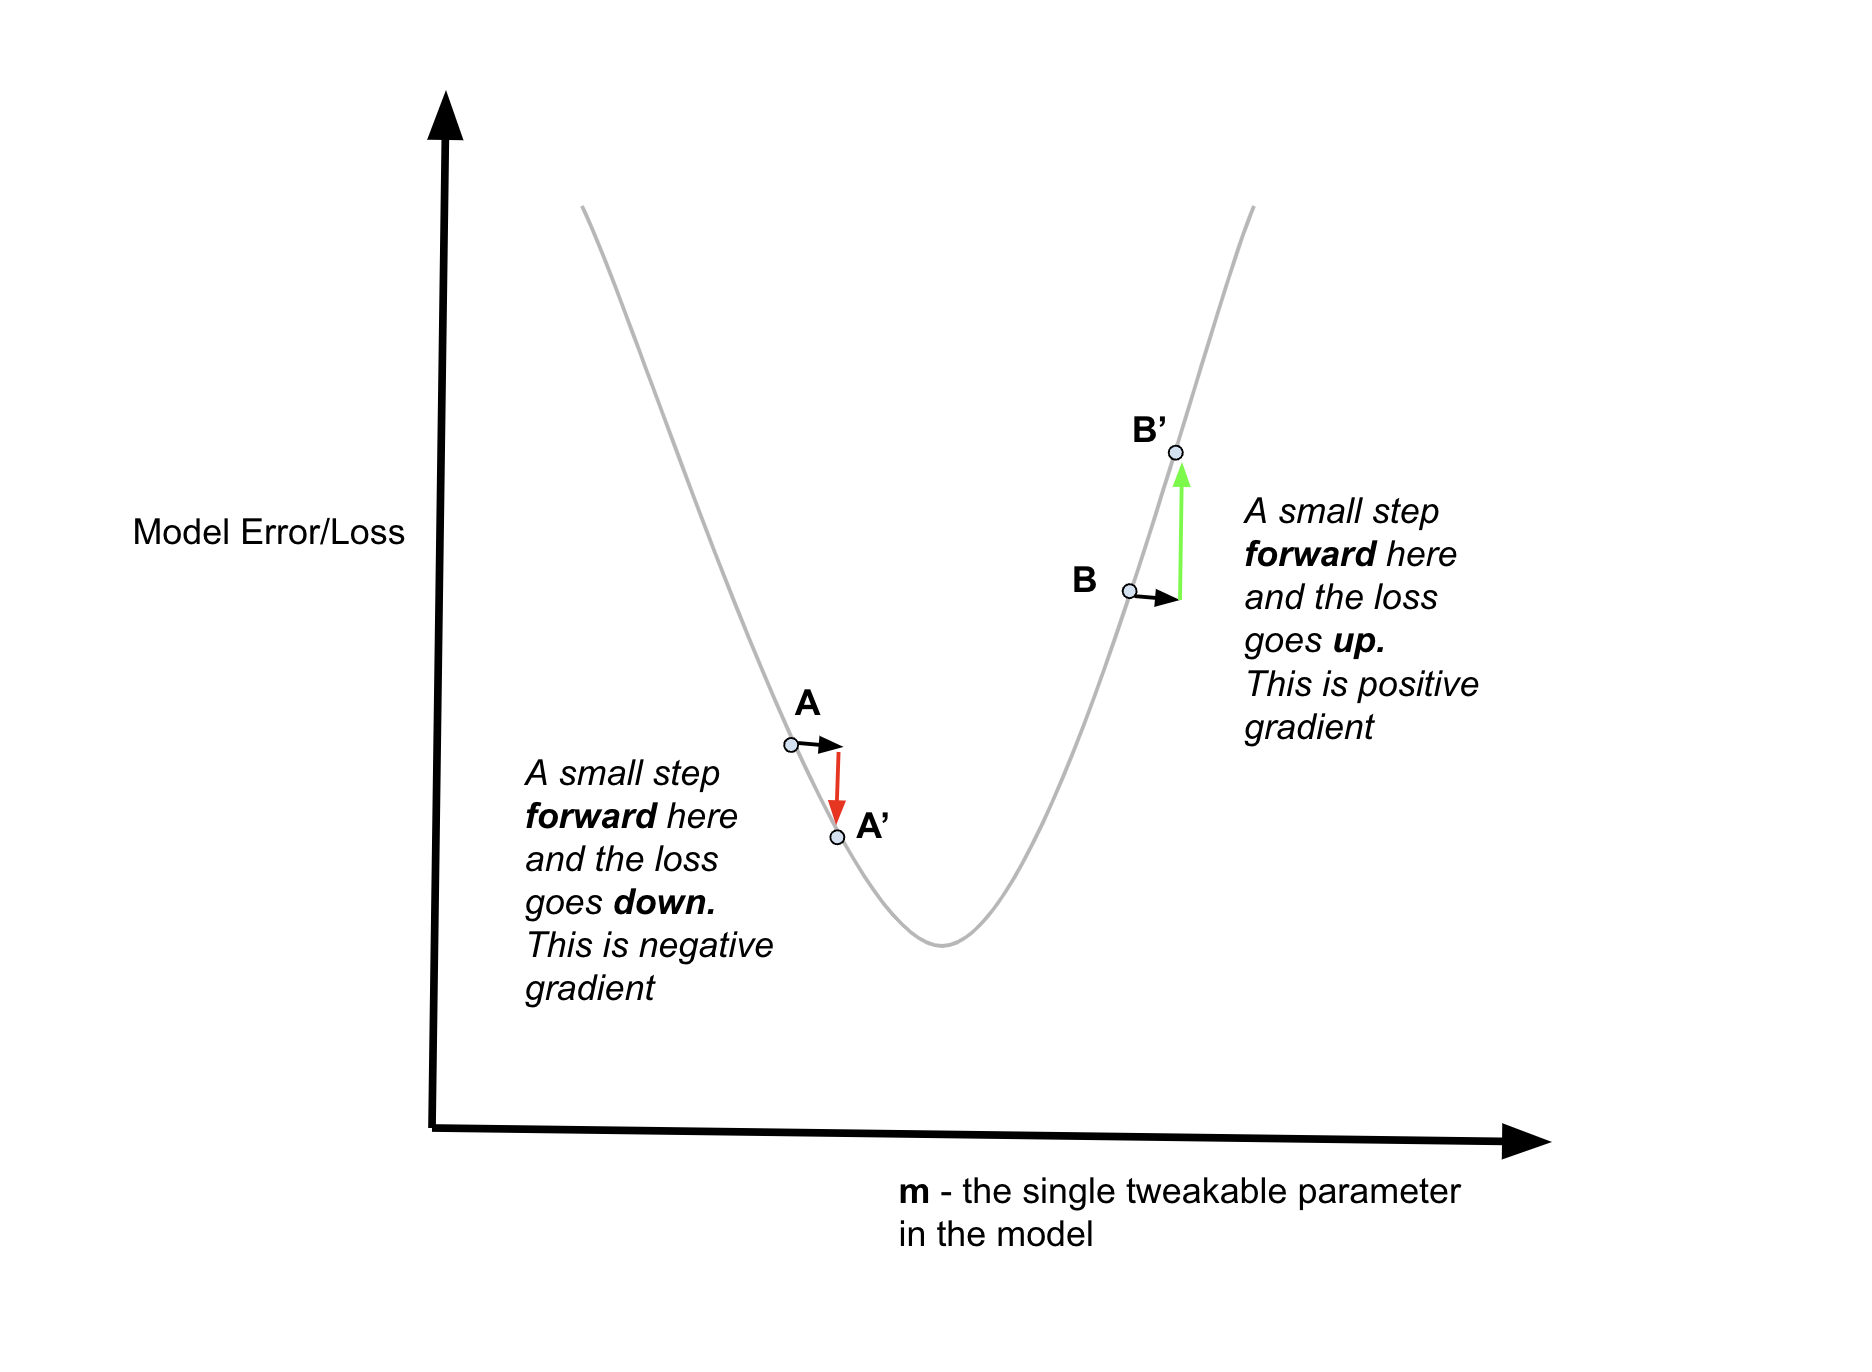



If we are at point A in the figure above and add a small amount to **m**, the loss goes down and we end up at A'. The slope or gradient of the line connecting A and A' is   (y2-y1)/(x2-x1) Where A is x1,y1 and A' is x2,y2. This gradient is negative (the function value went down)

If we are at point B and add a small amount to **m**, the loss goes up and we end up at B'. This gradient of the line connecting B and B' is positive (the function value went up).

So gradient gives us to pieces of information.  
-  **Direction of the function response** - Does the function go up or down for a small step **forward** in x direction
-  **Magnitude  of the function response** - the response at A is less than the response at B in the figure above

We can use the gradient to move up or down the loss function. To move up the loss function from a point, just add the gradient (or a small fraction of it) to the point. To move down the loss function just subtract the gradient (or a small fraction of it). This observation is true regardless of the shape of the loss function and the value of **m** (we can start with any random value of **m** and still walk downhill to the minimum loss value).

We will use this observation to minimize the error in our model. We will simply subtract a small portion of the gradient from the current value of **m**. We keep doing this iteratively to reduce the loss.

### Synthetic dataset creation


In [58]:
import numpy as np
import matplotlib.pyplot as plt

# generate synthetic data
np.random.seed(0)
count = 10
rooms = np.random.randint(1, 10, size=count)
#rooms = rooms.astype(int)
prices = 100 + 50 * rooms + np.random.normal(0, 20, count)
print(rooms)
print(prices)

[6 1 4 4 8 4 6 3 5 8]
[425.3223706  139.8824692  350.90401557 321.61623826 509.68624308
 311.58280957 396.36834855 278.20409262 342.51056618 505.50396631]


### 1. Line of best fit

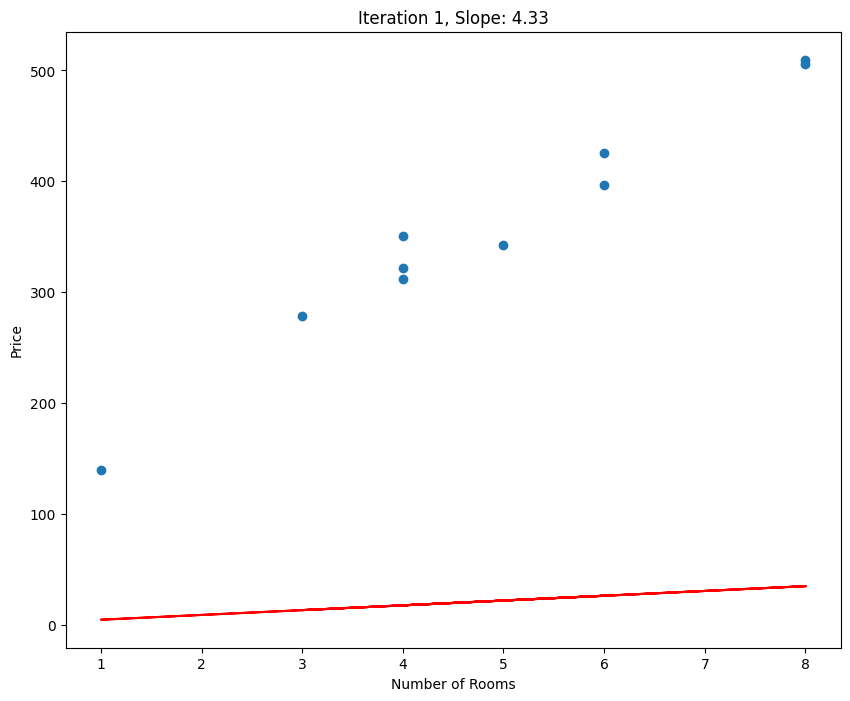

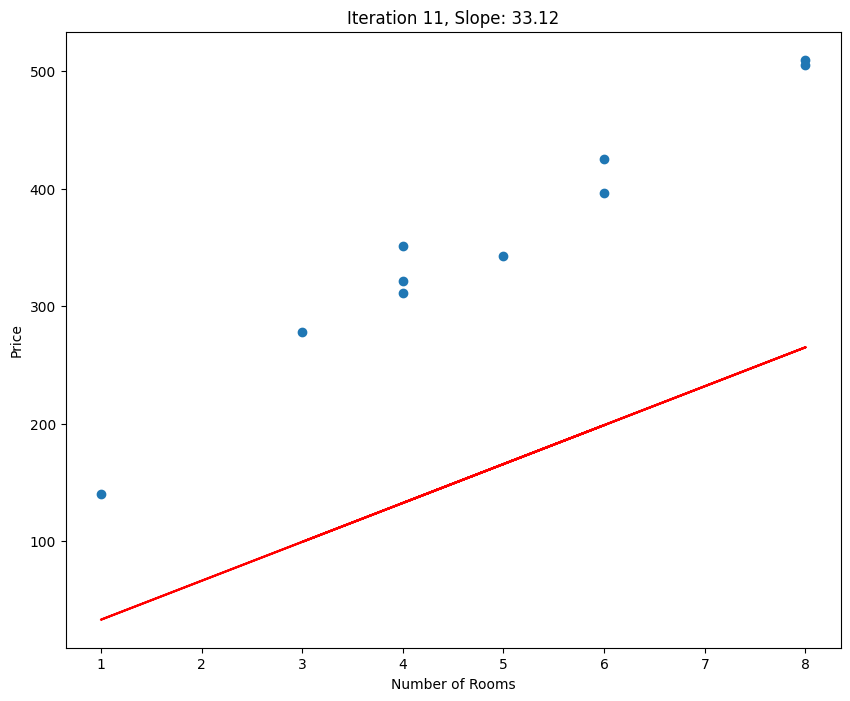

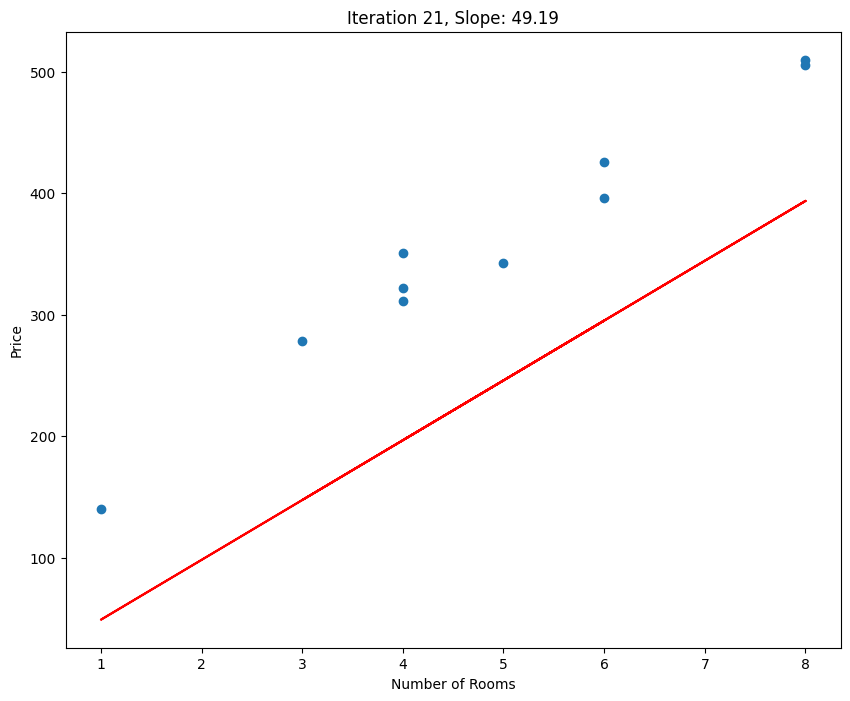

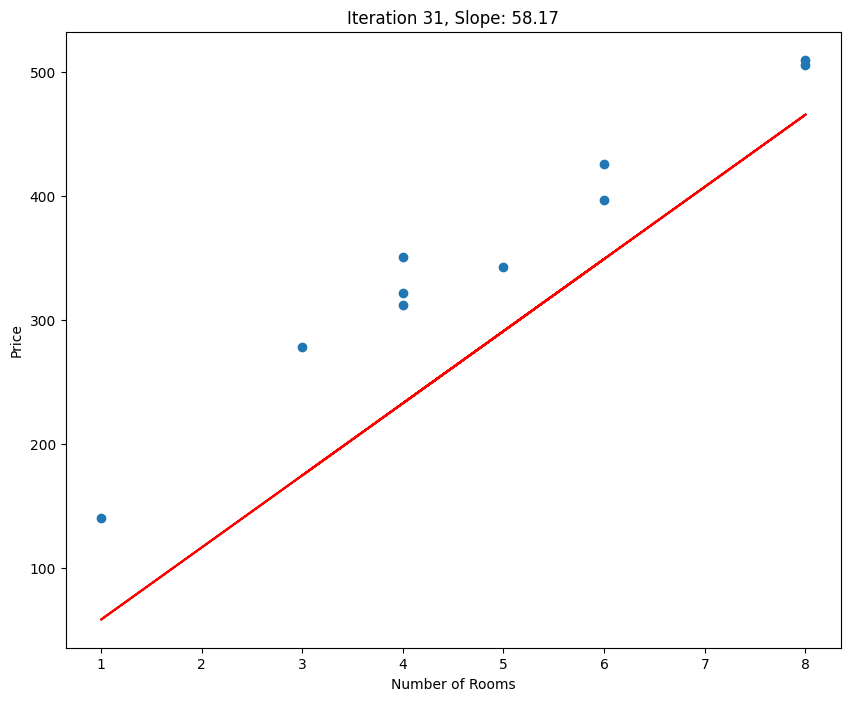

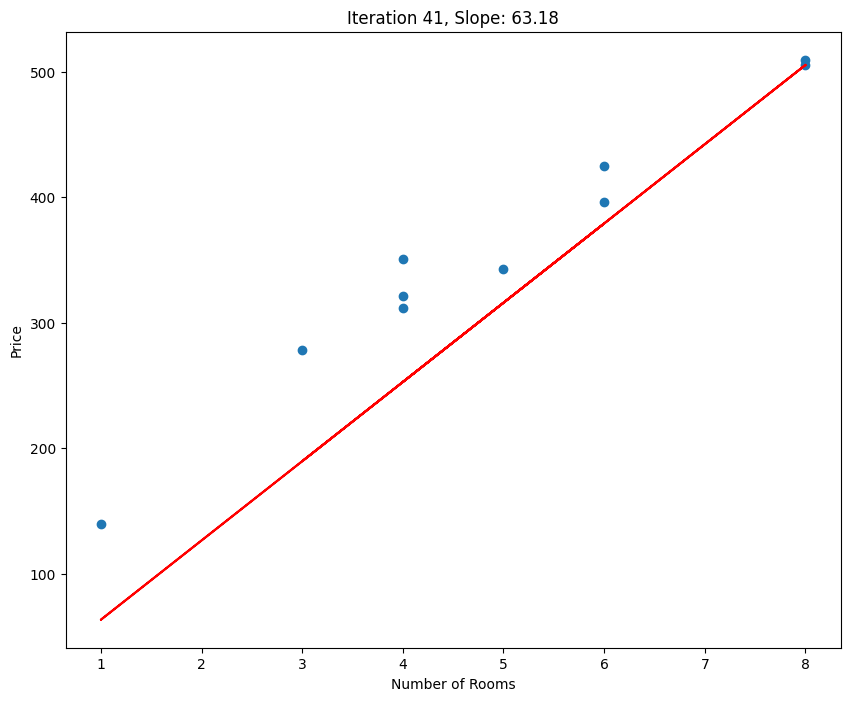

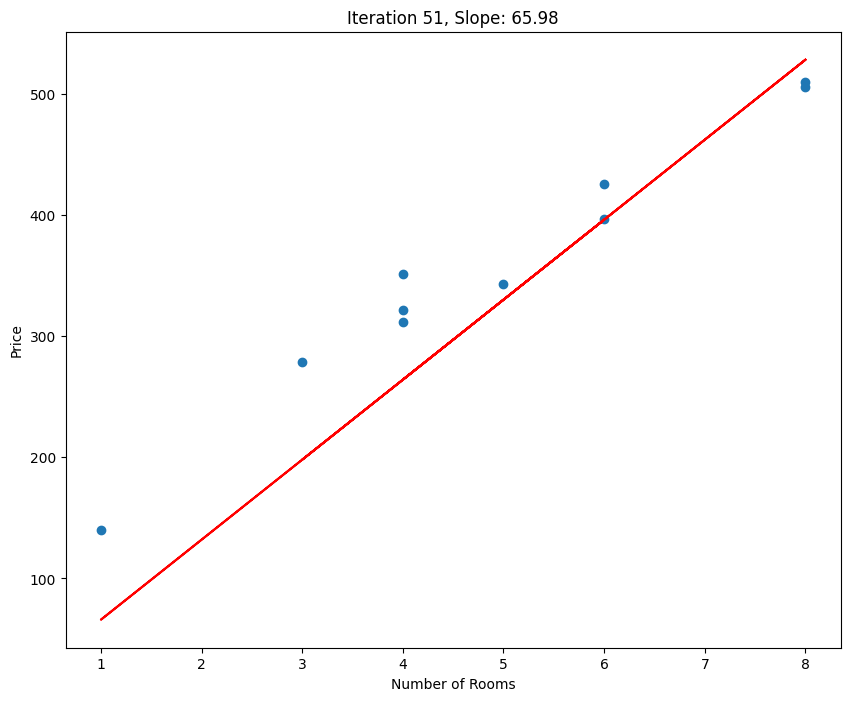

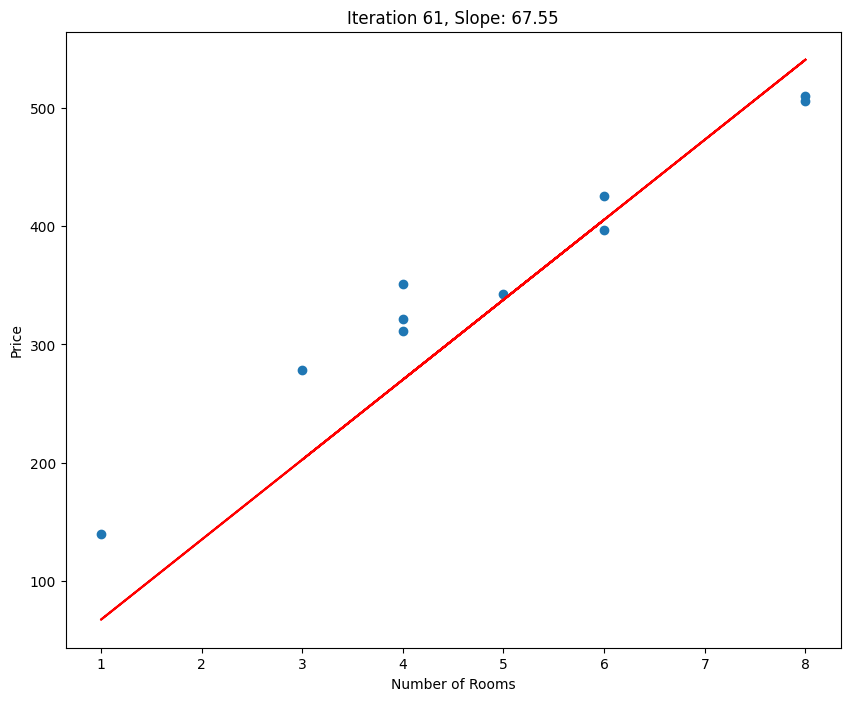

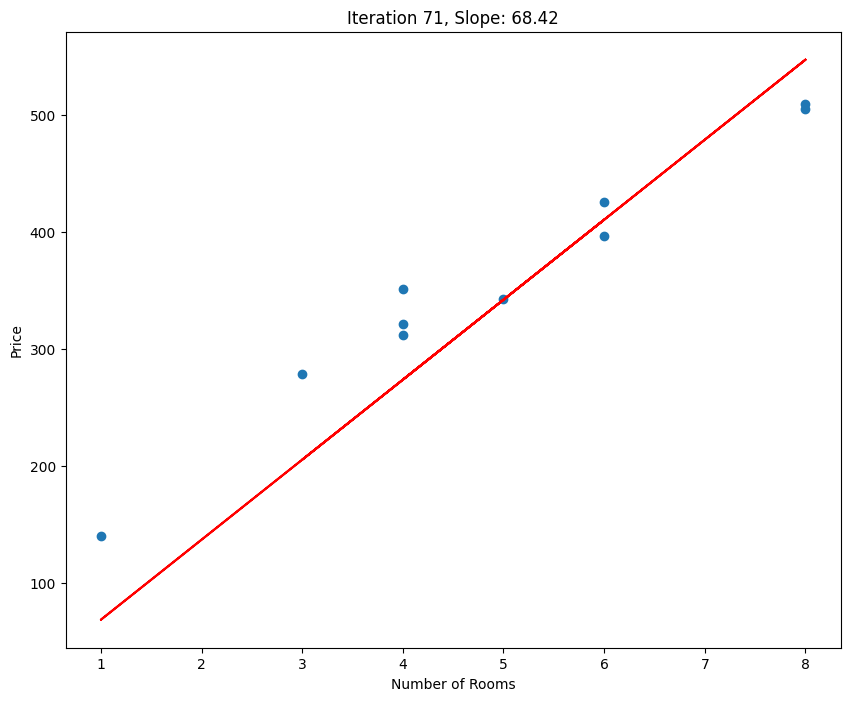

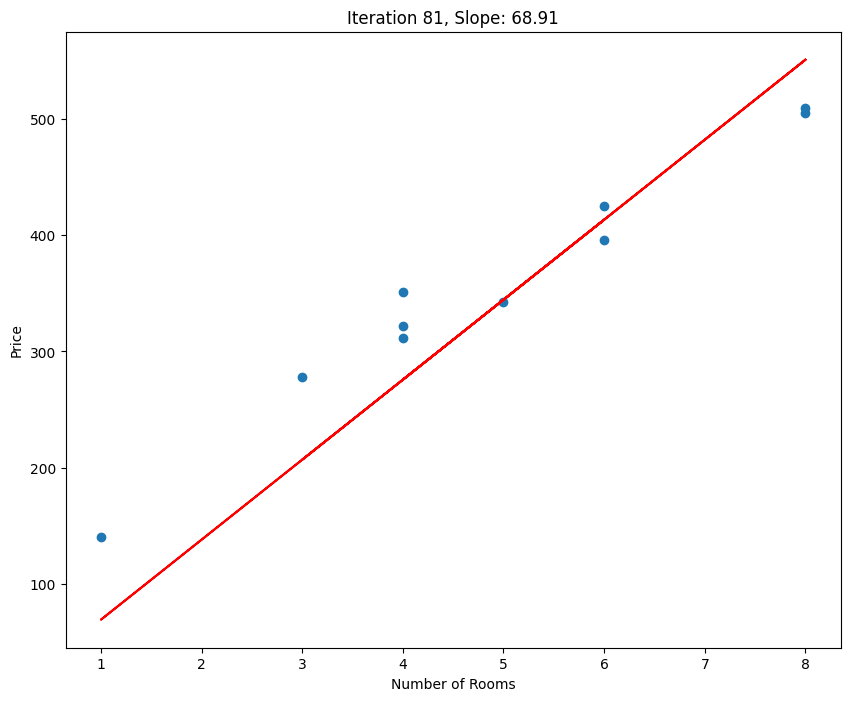

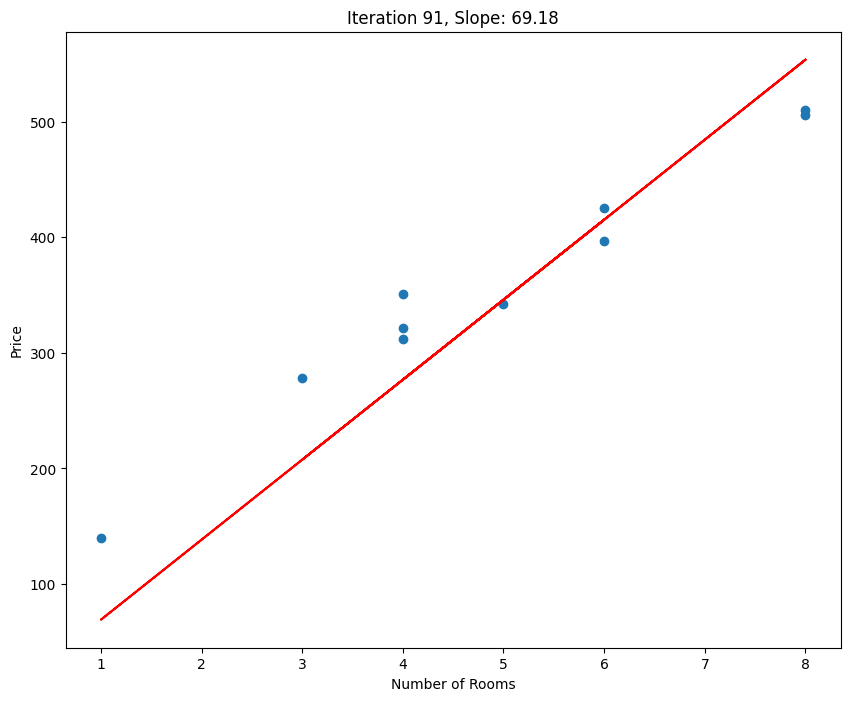

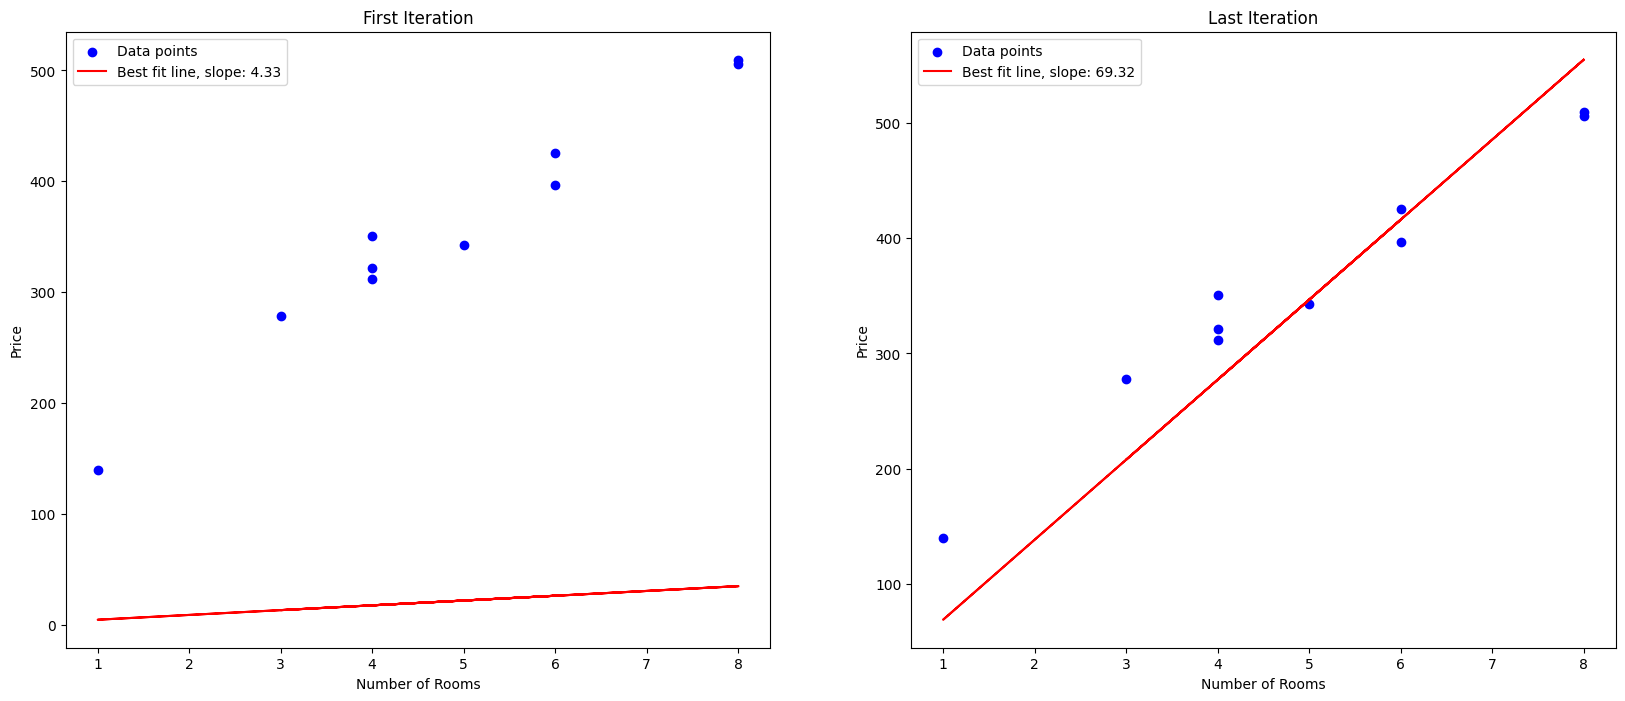

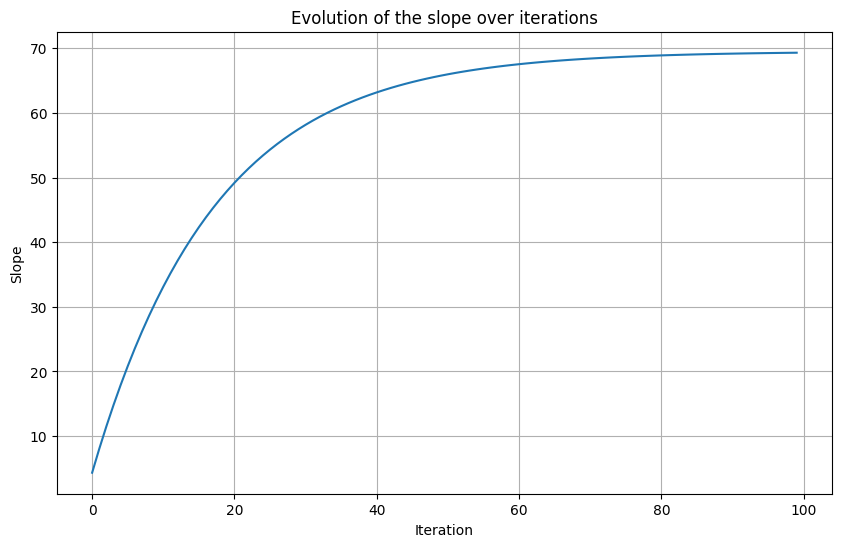

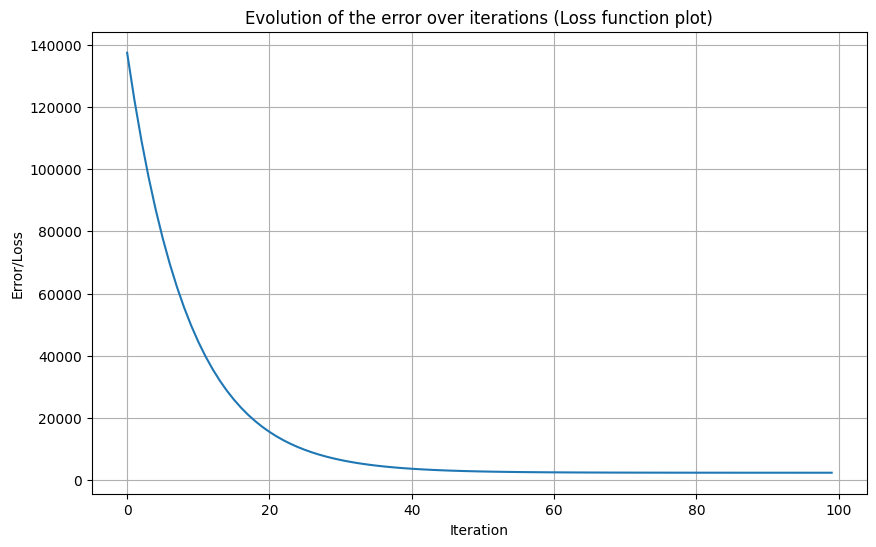

In [59]:
# Define function to predict prices
def predict_price(slope, rooms):
    return slope * rooms


# learning rate and number of iterations
lr = 0.001 #Tweak this to see how the model learning converges
iterations = 100

# initialize slope with a different random seed
np.random.seed(1)
slope = np.random.rand()

# training process
history_slope = []

history_error = []

#gradient step
h = .0001
for i in range(iterations):
    # predict prices
    #note rooms here contains all room counts of all the data points
    #in our training set. The predicted prices is also a vector that
    #hold the corresponding prices of those homes
    pred_prices = slope * rooms

    # calculate the average error across all training points
    #this is a single number
    error = np.mean((pred_prices - prices)*(pred_prices - prices))


    history_error.append(error)

    #Now calculate gradient:-  f(x+h) - f(x)/h
    #First bump up the slope a little.
    #This is the forward step in the x direction discussed above.
    slope_step = slope + h

    #Now Compute predicted prices with this forward step in m
    pred_prices_step =  slope_step * rooms

    #Calculate the average error in prediction after the forward step in the x direction
    step_error = np.mean((pred_prices_step - prices)*(pred_prices_step - prices))


    #gradient computation
     #f(x+h) - f(x)/h
    gradient = (step_error  - error)/h

    #Update slope. We subtract the gradient because we are walking downhill
    slope -= lr * gradient



    # save history
    history_slope.append(slope)

    # visualization
    if (i % 10 == 0):
      plt.figure(figsize=(10, 8))
      plt.scatter(rooms, prices)
      pred_prices_vals = predict_price(slope, rooms)
      plt.plot(rooms, pred_prices_vals, color='red')
      plt.title(f'Iteration {i+1}, Slope: {slope:.2f}')
      plt.xlabel('Number of Rooms')
      plt.ylabel('Price')
      plt.show()

# Predict prices for the first and last iterations
first_slope = history_slope[0]
last_slope = history_slope[-1]

pred_prices_first_iter = predict_price(first_slope, rooms)
pred_prices_last_iter = predict_price(last_slope, rooms)

# Plot the data points and the lines of best fit
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# First iteration
ax[0].scatter(rooms, prices, color='blue', label='Data points')
ax[0].plot(rooms, pred_prices_first_iter, color='red', label=f'Best fit line, slope: {first_slope:.2f}')
ax[0].set_title('First Iteration')
ax[0].set_xlabel('Number of Rooms')
ax[0].set_ylabel('Price')
ax[0].legend()

# Last iteration
ax[1].scatter(rooms, prices, color='blue', label='Data points')
ax[1].plot(rooms, pred_prices_last_iter, color='red', label=f'Best fit line, slope: {last_slope:.2f}')
ax[1].set_title('Last Iteration')
ax[1].set_xlabel('Number of Rooms')
ax[1].set_ylabel('Price')
ax[1].legend()


plt.show()


# Plot the evolution of the slope over iterations
plt.figure(figsize=(10, 6))
plt.plot(history_slope)
plt.title('Evolution of the slope over iterations')
plt.xlabel('Iteration')
plt.ylabel('Slope')
plt.grid(True)
plt.show()


#Plot the evolution of error over iterations
plt.figure(figsize=(10, 6))
plt.plot(history_error)
plt.title('Evolution of the error over iterations (Loss function plot)')
plt.xlabel('Iteration')
plt.ylabel('Error/Loss')
plt.grid(True)
plt.show()

**Additional notes**

*   In reality we dont reduce the loss the way we did here. We calculate the derivative of the loss function with respect to **m**. The approach we did here is an approximation of the derivative
*   Note the evolution of the loss over iterations. It falls sleeply at first and the plateaus. The steep fall is due to the gradient being steep when the loss is high. In practice optimizers tweak the learning rate as we go downhill, taking large steps first and then small steps as the loss starts to plateaue. This is to avoid overstepping past the lowest point by taking a large step.
* In the next video we will see how we could calculate the loss when there is more than one tweakable parameter
* The basic idea introduced here  - tweaking the parameter of a model to reduce loss or error in the model predictions(compared to the ground truth values), is exactly the same approach used in training billion parameter models like ChatGPT
* Finding the the correct value of **m**, can be done by other means. It does not require a machine learning model. We use machine learning approach to solve this problem, to illustrate how neural networks with large number of parameters learn.


